In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\Projects\sentiment_analysis_reviews\data\IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


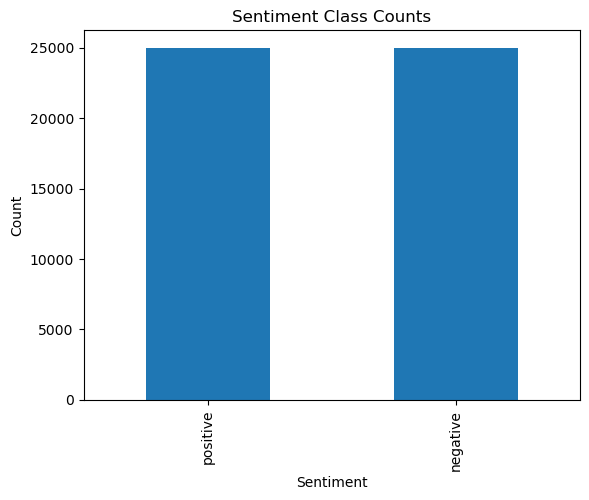

In [2]:
# Class balance (POSITIVE VS NEGATIVE)
df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Class Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


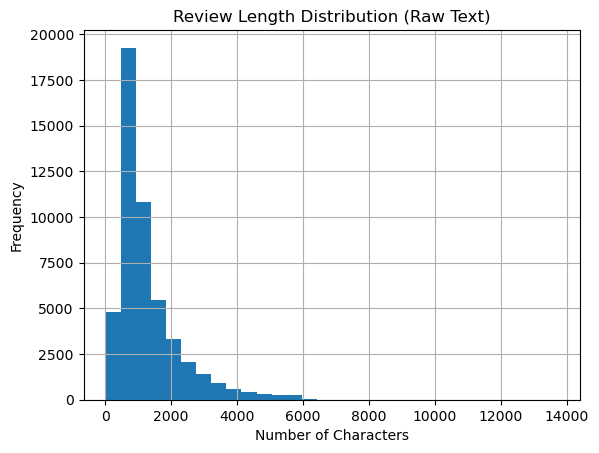

In [3]:
# Review length distribution (Raw text)
df["review_length"] = df["review"].astype(str).str.len()

df["review_length"].hist(bins=30)
plt.title("Review Length Distribution (Raw Text)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [4]:
# Clean the text column again
import re, string, nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r"<.*?>", "", text)
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\shwey\anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Top words
from collections import Counter

all_words = " ".join(df["clean_review"].astype(str)).split()
word_counts = Counter(all_words)

word_counts.most_common(20)


[('movie', 83506),
 ('film', 74462),
 ('one', 50366),
 ('like', 38825),
 ('good', 28483),
 ('even', 24280),
 ('would', 24001),
 ('time', 23265),
 ('really', 22894),
 ('see', 22432),
 ('story', 22046),
 ('much', 18895),
 ('well', 18449),
 ('get', 18181),
 ('great', 17719),
 ('bad', 17645),
 ('also', 17483),
 ('people', 17480),
 ('first', 16835),
 ('dont', 16580)]

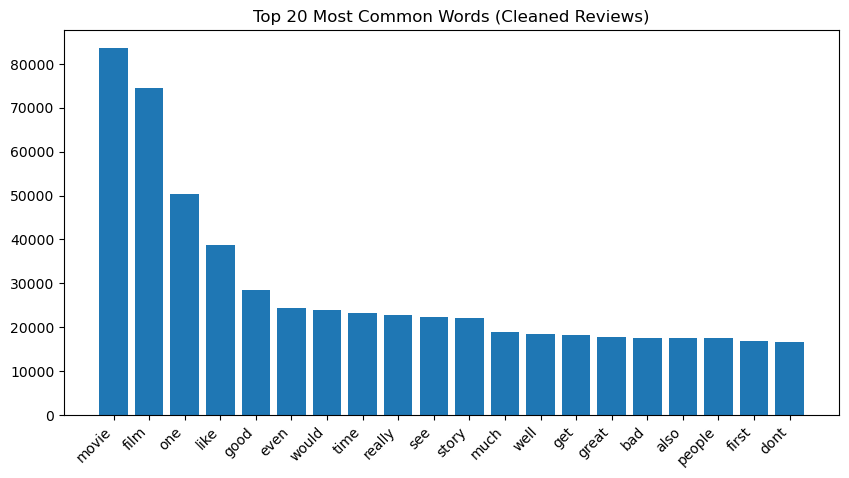

In [6]:
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words (Cleaned Reviews)")
plt.xticks(rotation=45, ha="right")
plt.show()
